### Assignment - 1

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [23]:
column_names=['engine_id','cycle','op_setting_1','op_setting_2','op_setting_3']+[f"sensor_{i}" for i in range(1,22)]
df=pd.read_csv('/content/drive/MyDrive/data/train_FD001.txt',sep='\s+',header=None,names=column_names)
print("The shape of DataFrame",df.shape)
print("The info of DataFrame",df.info())
df.head()

The shape of DataFrame (20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  floa

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4250004080.py:2: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv('/content/drive/MyDrive/data/train_FD001.txt',sep='\s+',header=None,names=column_names)


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

In [24]:
import seaborn as sns

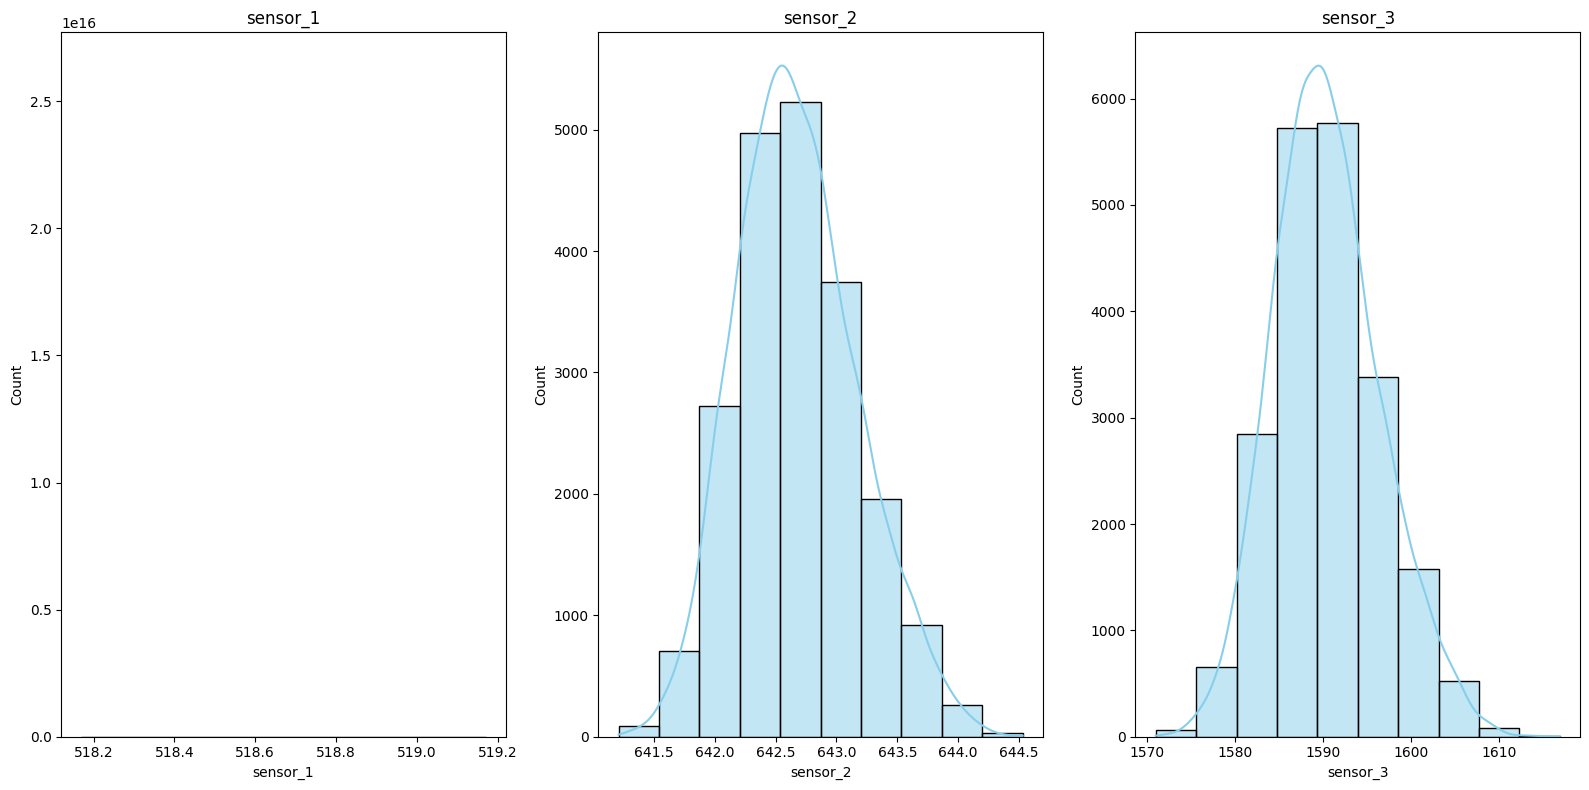

In [26]:
# Sensor example distributions
sensor_cols = [col for col in df.columns if "sensor_" in col]
plt.figure(figsize=(16,8))
for i, col in enumerate(sensor_cols[:3], 1):   # Show first 10 sensors for brevity
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=10, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


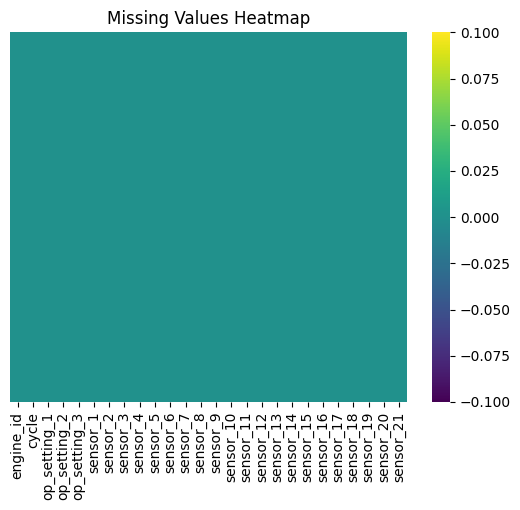

In [30]:
sns.heatmap(df.isnull(),cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [32]:
# Compute mean and std of sensor_2 per engine_id
df["sensor_2_mean"] = df.groupby("engine_id")["sensor_2"].transform("mean")
df["sensor_2_std"]  = df.groupby("engine_id")["sensor_2"].transform("std")

# Compute rolling mean of sensor_2 (window=5) per engine
df["sensor_2_roll_mean_5"] = df.groupby("engine_id")["sensor_2"].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

# Show sample rows
df[["engine_id", "cycle", "sensor_2", "sensor_2_mean", "sensor_2_std", "sensor_2_roll_mean_5"]].head(10)


,engine_id,cycle,sensor_2,sensor_2_mean,sensor_2_std,sensor_2_roll_mean_5
0,1,1,641.82,642.621042,0.486795,641.820000
1,1,2,642.15,642.621042,0.486795,641.985000
2,1,3,642.35,642.621042,0.486795,642.106667
3,1,4,642.35,642.621042,0.486795,642.167500
4,1,5,642.37,642.621042,0.486795,642.208000
5,1,6,642.10,642.621042,0.486795,642.264000
6,1,7,642.48,642.621042,0.486795,642.330000
7,1,8,642.56,642.621042,0.486795,642.372000
8,1,9,642.12,642.621042,0.486795,642.326000
9,1,10,641.71,642.621042,0.486795,642.194000


#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [35]:
from sklearn.preprocessing import StandardScaler

# Identify sensor columns
sensor_cols = [col for col in df.columns if "sensor_" in col]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform sensor columns
sensor_scaled = scaler.fit_transform(df[sensor_cols])

# Create a new DataFrame with scaled values
df_scaled = pd.DataFrame(sensor_scaled, columns=sensor_cols)

# Keep engine_id and cycle
df_normalized = pd.concat([df[["engine_id", "cycle"]].reset_index(drop=True),
                           df_scaled.reset_index(drop=True)], axis=1)

# Show head of normalized DataFrame
print("Head of Normalized DataFrame:")
df_normalized.head()




Head of Normalized DataFrame:


,engine_id,cycle,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_2_mean,sensor_2_std,sensor_2_roll_mean_5
0,1,1,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,0.141683,1.121141,-0.516338,...,-0.603816,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,-0.33115,0.458497,-2.067769
1,1,2,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,0.141683,0.431930,-0.798093,...,-0.275852,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,-0.33115,0.458497,-1.665516
2,1,3,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,0.141683,1.008155,-0.234584,...,-0.649144,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,-0.33115,0.458497,-1.368905
3,1,4,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,0.141683,1.222827,0.188048,...,-1.971665,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,-0.33115,0.458497,-1.220599
4,1,5,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,0.141683,0.714393,-0.516338,...,-0.339845,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,-0.33115,0.458497,-1.121865


In [38]:
# Check means and stds of normalized data
print("\nCheck Means (should be ~0):")
df_normalized[sensor_cols].mean().round(3)




Check Means (should be ~0):


,0
sensor_1,0.0
sensor_2,0.0
sensor_3,-0.0
sensor_4,0.0
sensor_5,-0.0
sensor_6,-0.0
sensor_7,-0.0
sensor_8,0.0
sensor_9,-0.0
sensor_10,0.0


In [39]:
print("\nCheck Stds (should be ~1):")
df_normalized[sensor_cols].std().round(3)


Check Stds (should be ~1):


,0
sensor_1,0.0
sensor_2,1.0
sensor_3,1.0
sensor_4,1.0
sensor_5,0.0
sensor_6,1.0
sensor_7,1.0
sensor_8,1.0
sensor_9,1.0
sensor_10,0.0


#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.

In [40]:
# Columns to use as features (exclude id and cycle, plus target if any)
exclude_cols=['engine_id','cycle']
feature_cols=[col for col in df.columns if col not in exclude_cols]
# Sort data by engine_id and cycle to ensure correct temporal order
df_normalized=df_normalized.sort_values(by=['engine_id','cycle']).reset_index(drop=True)

In [52]:
def generate_rolling_windows(data, engine_col, features, window_size=30):
    sequences = []
    engine_ids = []
    cycle_ids = []

    for engine in data[engine_col].unique():
        engine_data = data[data[engine_col] == engine]
        engine_features = engine_data[features].values

        # Generate sequences with rolling window
        for i in range(window_size - 1, len(engine_data)):
            seq = engine_features[i - window_size + 1 : i + 1]
            sequences.append(seq)
            engine_ids.append(engine)
            cycle_ids.append(engine_data.iloc[i]['cycle'])

    # Convert to array for modeling
    sequences = np.array(sequences)
    return sequences, engine_ids, cycle_ids

In [53]:
window_size = 30  # Typical rolling window length; adjust as needed
sequences, engine_ids, cycle_ids = generate_rolling_windows(df, 'engine_id', feature_cols, window_size)

print("Shape of rolling window sequences:", sequences.shape)  # (num_sequences, window_size, num_features)
print("Example sequence shape:", sequences[0].shape)


Shape of rolling window sequences: (17731, 30, 27)
Example sequence shape: (30, 27)


In [54]:
# Print the first sequence info
print(f"Engine ID: {engine_ids[0]}, Cycle: {cycle_ids[0]}")
print("Sequence data for first time window (shape {}):".format(sequences[0].shape))
print(sequences[0])

Engine ID: 1, Cycle: 30.0
Sequence data for first time window (shape (30, 27)):
[[-7.00000000e-04 -4.00000000e-04  1.00000000e+02  5.18670000e+02
   6.41820000e+02  1.58970000e+03  1.40060000e+03  1.46200000e+01
   2.16100000e+01  5.54360000e+02  2.38806000e+03  9.04619000e+03
   1.30000000e+00  4.74700000e+01  5.21660000e+02  2.38802000e+03
   8.13862000e+03  8.41950000e+00  3.00000000e-02  3.92000000e+02
   2.38800000e+03  1.00000000e+02  3.90600000e+01  2.34190000e+01
   6.42621042e+02  4.86795224e-01  6.41820000e+02]
 [ 1.90000000e-03 -3.00000000e-04  1.00000000e+02  5.18670000e+02
   6.42150000e+02  1.59182000e+03  1.40314000e+03  1.46200000e+01
   2.16100000e+01  5.53750000e+02  2.38804000e+03  9.04407000e+03
   1.30000000e+00  4.74900000e+01  5.22280000e+02  2.38807000e+03
   8.13149000e+03  8.43180000e+00  3.00000000e-02  3.92000000e+02
   2.38800000e+03  1.00000000e+02  3.90000000e+01  2.34236000e+01
   6.42621042e+02  4.86795224e-01  6.41985000e+02]
 [-4.30000000e-03  3.00000

In [55]:
# Save sequences and metadata for modeling
np.save('rolling_window_sequences.npy', sequences)
pd.DataFrame({'engine_id': engine_ids, 'cycle': cycle_ids}).to_csv('sequence_metadata.csv', index=False)